In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
x = pd.read_csv(r'/content/sample_data/WorldHits.csv')
x.head()

,Track,Artist,Album,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
0,Release,Afro Celt Sound System,Volume 2: Release (Real World Gold),2005,456160,4,0.633,0.828,5,-7.266,0,0.0480,0.0216,0.055800,0.1080,0.537,100.089,31
1,Saor / Free / News from Nowhere,Afro Celt Sound System,Vol. 1: Sound Magic (Real World Gold),1999,501093,4,0.511,0.524,7,-10.504,1,0.0305,0.0260,0.879000,0.1060,0.118,81.996,24
2,When You're Falling,Afro Celt Sound System,Volume 3 : Further In Time (Real World Gold),2003,314160,4,0.638,0.822,11,-7.305,1,0.0380,0.0508,0.000025,0.0895,0.802,99.010,36
3,Whirl-Y-Reel 1,Afro Celt Sound System,Vol. 1: Sound Magic (Real World Gold),1999,441200,4,0.645,0.810,2,-8.133,1,0.0381,0.1320,0.395000,0.0825,0.530,132.021,25
4,Electric Rendezvous,Al Di Meola,Electric Rendezvous,1982,467266,4,0.337,0.658,9,-12.241,1,0.0388,0.1010,0.748000,0.1130,0.507,108.143,19


In [107]:
x.shape

(326, 18)

In [108]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             326 non-null    object 
 1   Artist            326 non-null    object 
 2   Album             326 non-null    object 
 3   Year              326 non-null    int64  
 4   Duration          326 non-null    int64  
 5   Time_Signature    326 non-null    int64  
 6   Danceability      326 non-null    float64
 7   Energy            326 non-null    float64
 8   Key               326 non-null    int64  
 9   Loudness          326 non-null    float64
 10  Mode              326 non-null    int64  
 11  Speechiness       326 non-null    float64
 12  Acousticness      326 non-null    float64
 13  Instrumentalness  326 non-null    float64
 14  Liveness          326 non-null    float64
 15  Valence           326 non-null    float64
 16  Tempo             326 non-null    float64
 1

In [109]:
# convert the Year column from int64 to a datetime type
x['Year'] = pd.to_datetime(x['Year'], format='%Y').dt.year

# convert 'Time_Signature','Energy','Key','Mode' columns from int64 to a category type
x[['Time_Signature','Key','Mode']] = x[['Time_Signature','Key','Mode']].astype('category')

In [110]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Track             326 non-null    object  
 1   Artist            326 non-null    object  
 2   Album             326 non-null    object  
 3   Year              326 non-null    int32   
 4   Duration          326 non-null    int64   
 5   Time_Signature    326 non-null    category
 6   Danceability      326 non-null    float64 
 7   Energy            326 non-null    float64 
 8   Key               326 non-null    category
 9   Loudness          326 non-null    float64 
 10  Mode              326 non-null    category
 11  Speechiness       326 non-null    float64 
 12  Acousticness      326 non-null    float64 
 13  Instrumentalness  326 non-null    float64 
 14  Liveness          326 non-null    float64 
 15  Valence           326 non-null    float64 
 16  Tempo             326 non-

In [111]:
x.describe()

,Year,Duration,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
count,326.000000,3.260000e+02,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000,326.000000
mean,1992.407975,3.337062e+05,0.522381,0.502092,-11.799755,0.061305,0.519446,0.240264,0.215337,0.503624,115.968460,28.346626
std,12.680298,2.680486e+05,0.170469,0.259283,5.159427,0.065734,0.331782,0.344821,0.210846,0.270387,28.174109,15.960512
min,1958.000000,4.188000e+04,0.078800,0.005620,-36.178000,0.023800,0.000002,0.000000,0.028200,0.030900,44.757000,0.000000
25%,1985.000000,2.124700e+05,0.404250,0.292250,-14.645000,0.034225,0.196500,0.000031,0.093600,0.283250,94.757500,17.000000
50%,1995.000000,2.648330e+05,0.542000,0.489500,-11.055500,0.041600,0.558000,0.014250,0.124000,0.516000,112.277000,28.000000
75%,2002.000000,3.498832e+05,0.657750,0.729000,-7.894500,0.059900,0.830750,0.512000,0.257500,0.732250,131.378250,38.000000
max,2019.000000,3.060650e+06,0.946000,0.985000,-1.656000,0.698000,0.991000,0.967000,0.987000,0.964000,200.076000,81.000000


In [112]:
# get distinct values for each specified column
col = ['Year','Time_Signature','Key','Mode']
for column in col:
    unique_values = x[column].unique()
    print(f"'{column}': {unique_values}")

'Year': [2005 1999 2003 1982 1981 1980 1979 1986 1990 2013 2001 2006 2004 1994
 1975 1998 1996 1997 1963 1959 2000 1984 1987 1995 1988 1993 2010 2019
 2007 1992 1989 1985 1964 1969 1965 1977 1991 2002 1973 1971 1974 2009
 2015 1978 1976 1962 2008 1983 1966 2012 1967 1968 1958]
'Time_Signature': [4, 3, 5, 1]
Categories (4, int64): [1, 3, 4, 5]
'Key': [5, 7, 11, 2, 9, ..., 8, 0, 3, 1, 10]
Length: 12
Categories (12, int64): [0, 1, 2, 3, ..., 8, 9, 10, 11]
'Mode': [0, 1]
Categories (2, int64): [0, 1]


- The Key represents 12 numbers corresponding to the 12 unique chromatic keys in Western music. Here’s a list of these 12 keys: C, C# (or Db), D, D# (or Eb), E, F, F# (or Gb), G, G# (or Ab), A, A# (or Bb), B. Each key represents a different tonal center or root note.
- Mode: The modality of the track indicates whether it is in a major (1) or minor (0) key.

In [113]:
# take the unique values in the 'Key' column and sort them
unique_keys = sorted(x['Key'].unique())
print(unique_keys)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [114]:
key_mapping = {0: 'C', 1: 'C# / Db', 2: 'D', 3: 'D# / Eb', 4: 'E', 5: 'F', 6: 'F# / Gb',7: 'G', 8: 'G# / Ab', 9: 'A', 10: 'A# / Bb', 11: 'B' }

# apply the mapping to the 'Key' column
x['Key'] = x['Key'].map(key_mapping)
print(x['Key'].head())

0    F
1    G
2    B
3    D
4    A
Name: Key, dtype: category
Categories (12, object): ['C', 'C# / Db', 'D', 'D# / Eb', ..., 'G# / Ab', 'A', 'A# / Bb', 'B']


In [115]:
import math
# function to convert the 'Duration' column to minutes with decimal seconds
def convert_ms_to_minutes(ms):
    minutes = math.floor((ms / 60000)%60)
    return f"{minutes}"

# apply the function to the 'Duration' column
x['Duration_mm'] = x['Duration'].apply(convert_ms_to_minutes)

# display the df
print(x[['Track', 'Duration_mm']])

                               Track Duration_mm
0                            Release           7
1    Saor / Free / News from Nowhere           8
2                When You're Falling           5
3                     Whirl-Y-Reel 1           7
4                Electric Rendezvous           7
..                               ...         ...
321                           Birima           3
322                       Mame Bamba           4
323                         Salimata           4
324                              Set           3
325                        Wiri-Wiri           4

[326 rows x 2 columns]


In [116]:
def seconds(ms):
    seconds = (ms / 1000)%60
    return f"{seconds:.2f}"

x['Duration_ss'] = x['Duration'].apply(seconds)
print(x[['Track', 'Duration_ss']])

                               Track Duration_ss
0                            Release       36.16
1    Saor / Free / News from Nowhere       21.09
2                When You're Falling       14.16
3                     Whirl-Y-Reel 1       21.20
4                Electric Rendezvous       47.27
..                               ...         ...
321                           Birima       48.37
322                       Mame Bamba       56.89
323                         Salimata       14.13
324                              Set       46.83
325                        Wiri-Wiri        7.47

[326 rows x 2 columns]


In [117]:
print(x[['Track', 'Duration_mm','Duration_ss']])

                               Track Duration_mm Duration_ss
0                            Release           7       36.16
1    Saor / Free / News from Nowhere           8       21.09
2                When You're Falling           5       14.16
3                     Whirl-Y-Reel 1           7       21.20
4                Electric Rendezvous           7       47.27
..                               ...         ...         ...
321                           Birima           3       48.37
322                       Mame Bamba           4       56.89
323                         Salimata           4       14.13
324                              Set           3       46.83
325                        Wiri-Wiri           4        7.47

[326 rows x 3 columns]


In [118]:
# replace the values in the 'Mode' column
x['Mode'] = x['Mode'].replace({0: 'Minor', 1: 'Major'})

In [119]:
x.head()

,Track,Artist,Album,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Duration_mm,Duration_ss
0,Release,Afro Celt Sound System,Volume 2: Release (Real World Gold),2005,456160,4,0.633,0.828,F,-7.266,Minor,0.0480,0.0216,0.055800,0.1080,0.537,100.089,31,7,36.16
1,Saor / Free / News from Nowhere,Afro Celt Sound System,Vol. 1: Sound Magic (Real World Gold),1999,501093,4,0.511,0.524,G,-10.504,Major,0.0305,0.0260,0.879000,0.1060,0.118,81.996,24,8,21.09
2,When You're Falling,Afro Celt Sound System,Volume 3 : Further In Time (Real World Gold),2003,314160,4,0.638,0.822,B,-7.305,Major,0.0380,0.0508,0.000025,0.0895,0.802,99.010,36,5,14.16
3,Whirl-Y-Reel 1,Afro Celt Sound System,Vol. 1: Sound Magic (Real World Gold),1999,441200,4,0.645,0.810,D,-8.133,Major,0.0381,0.1320,0.395000,0.0825,0.530,132.021,25,7,21.20
4,Electric Rendezvous,Al Di Meola,Electric Rendezvous,1982,467266,4,0.337,0.658,A,-12.241,Major,0.0388,0.1010,0.748000,0.1130,0.507,108.143,19,7,47.27


In [120]:
x.to_csv("Cleaned_SpotifyAnalysis.csv",index=False)

1. Tracks with no popularity

In [121]:
# filter the DataFrame for rows where 'Popularity' is 0
df = x[x['Popularity'] == 0][['Album', 'Track', 'Artist', 'Popularity']]
df

,Album,Track,Artist,Popularity
54,Csillagfészek,A Szerelemről,Both Miklós Folkside,0
55,Csillagfészek,Csillagfészek,Both Miklós Folkside,0
118,Live In Skopje 2019,Balada o Pisonji I Zugi-live,Dr Nele Karajlic,0
119,Live In Skopje 2019,Necu da budem svabo u dotiranom filmu-live,Dr Nele Karajlic,0
189,Locus Solus,Switch,John Zorn,0


2. Top 10 Most Mentioned Artists

In [122]:
x.Artist.value_counts().head(10)

,count
Artist,
Ali Farka Touré,10
Fela Kuti,10
Dead Can Dance,10
Angelique Kidjo,9
Demis Roussos,9
Manu Chao,9
Bill Frisell,8
Mercan Dede,8
Youssou N'Dour,7


3. Top 5 artist with average song popularity

In [123]:
artist_song_popularity = x.groupby('Artist')['Popularity'].mean().reset_index().sort_values(by='Popularity', ascending=False)
artist_song_popularity.head(10)

,Artist,Popularity
47,Manu Chao,59.777778
14,Celso Piña,59.000000
40,Jon Stefans,58.000000
15,Cesária Evora,58.000000
28,Enya,54.428571
33,Ilaiyaraaja,50.800000
16,Chico César,50.333333
56,Ragheb Alama,49.000000
31,Ibrahim Ferrer,45.800000
46,Mano Negra,45.333333


In [124]:
corr_duration_and_popularity = x[["Popularity", "Duration"]].corr().iloc(0)[0][1]
print(f"Correlation between Popularity and Duration of a song is = {corr_duration_and_popularity:.2f}")

Correlation between Popularity and Duration of a song is = -0.13


<ipython-input-124-c0d71597c532>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  corr_duration_and_popularity = x[["Popularity", "Duration"]].corr().iloc(0)[0][1]


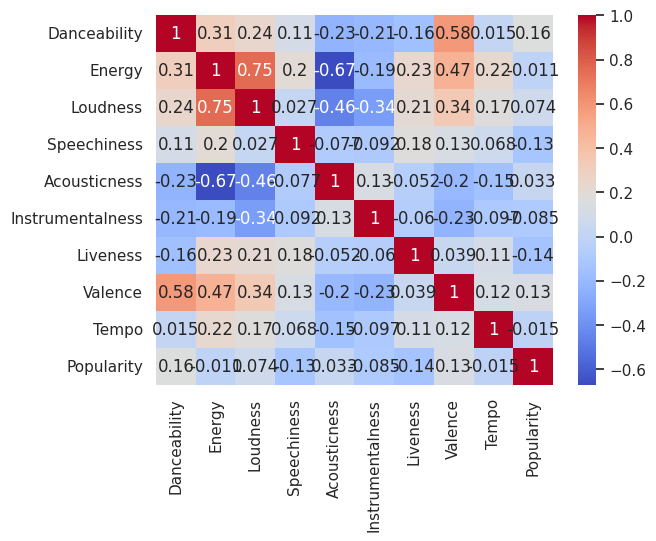

In [153]:
columns_to_plot = [ 'Danceability', 'Energy', 'Loudness', 'Speechiness',
                    'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo','Popularity' ]
corr_matrix = x[columns_to_plot].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

There is Energy and Acousticness have a negative correlation (-0.67) and a positive correlation with Loudness (0.75). These co|rrelations reveal that energetic songs in the dataset tend to be louder and less acoustic, implying a preference for electronic production in high-energy music. Conversely, more acoustic songs are likely to be calmer and less intense.
There is a positive correlation (0.13) between Popularity and Valence which implies positive songs are more popular.

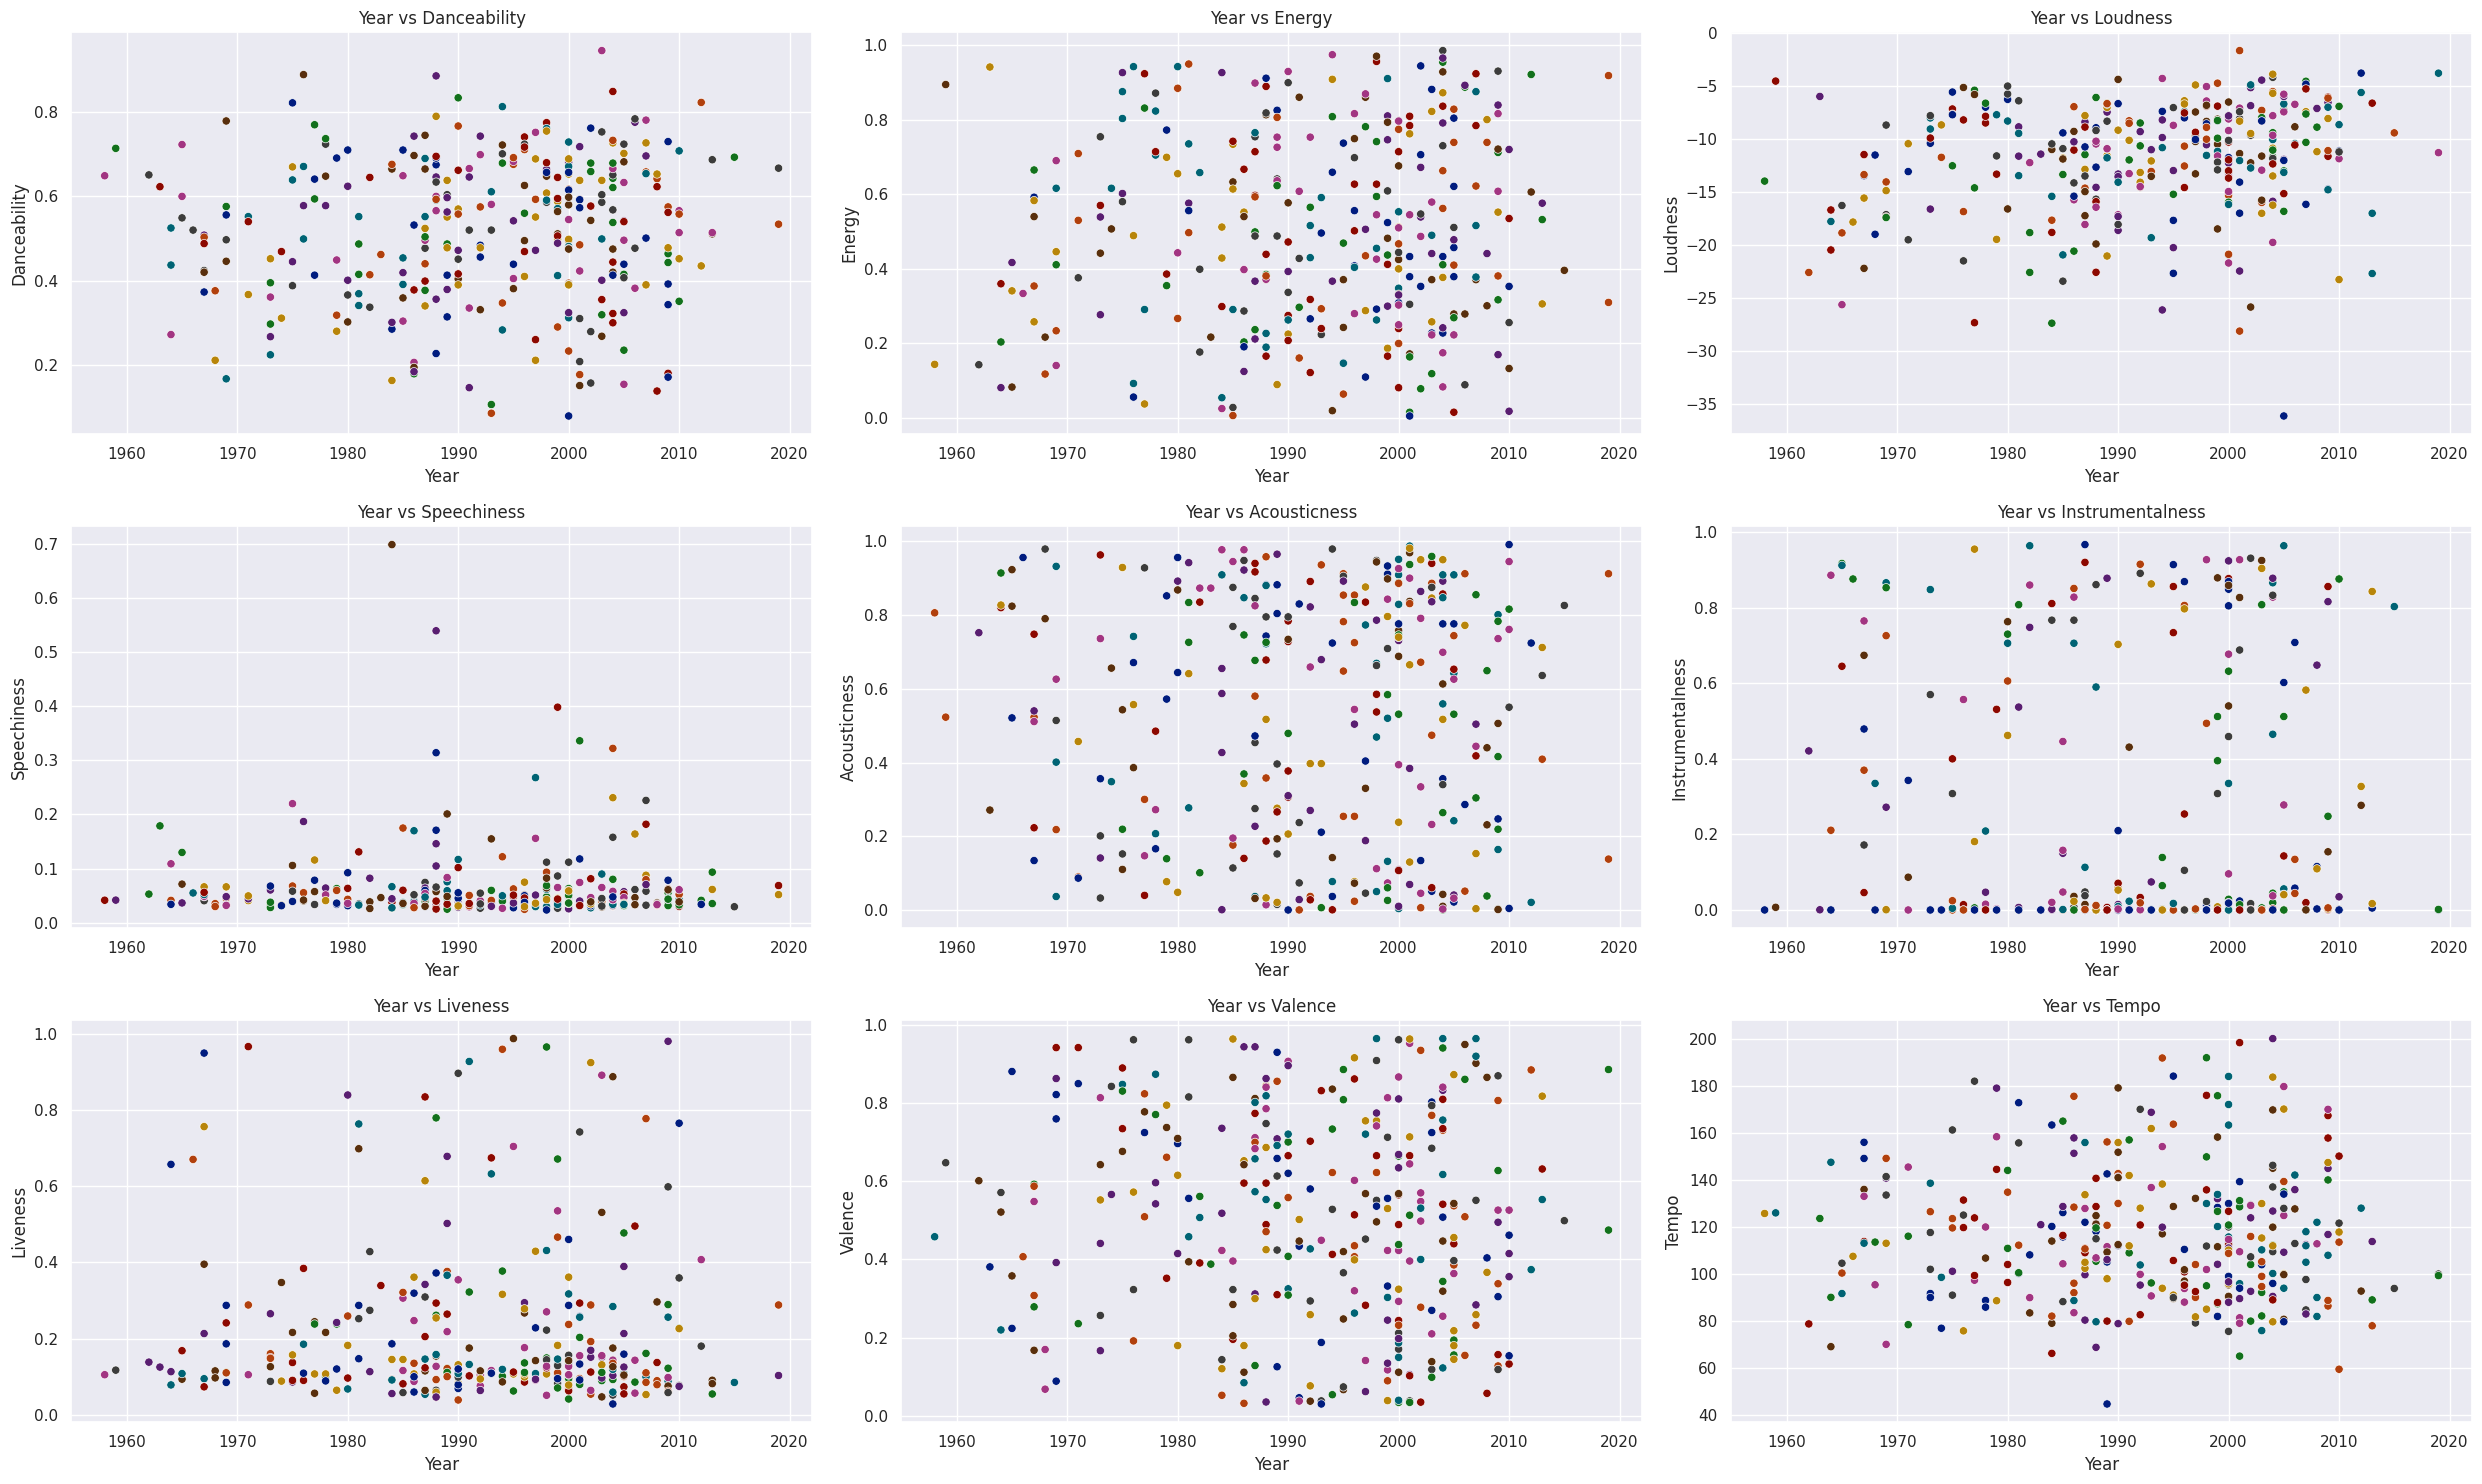

In [154]:
# create a scatter plot showing trends over the years with characteristics of the tracks
plt.figure(figsize=(25, 15))
columns_to_plot.pop()
for i, col in enumerate(columns_to_plot, start=1):
    plt.subplot(3, 3, i)  # Adjust the grid size based on the number of plots
    sns.scatterplot(data = x, x='Year', y=col, hue=col, palette='dark', legend=False)
    plt.title(f'Year vs {col}')
    plt.xlabel('Year')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


- Loudness of music has been kept in a range of 0 to -20 over the years reveals that music standards have been maintained and a lot of emphasis has been put on sound quality.
- Instrumentalness in music is not used much in 2010 - 2020 era and it is a widely used concept of the late 1900s.
- Most of the tracks have a liveness of 0 to 0.4 over the years, which suggests that the recordings are mostly from the studio with few direct sound elements from the audience. The trend of music production has not changed much in terms of live sound levels over the years.

In [156]:
df2=pd.DataFrame()
for i in columns_to_plot:
  df2[i]=x.groupby("Year")[i].mean()
df2.reset_index(inplace=True)
df2.head()

,Year,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,1958,0.649000,0.144000,-13.986000,0.041800,0.806000,0.000005,0.105000,0.458000,125.740
1,1959,0.714000,0.894000,-4.536000,0.042000,0.523000,0.007060,0.117000,0.647000,125.995
2,1962,0.651000,0.143000,-22.617000,0.053100,0.752000,0.421000,0.138000,0.601000,78.792
3,1963,0.623000,0.941000,-5.987000,0.179000,0.271000,0.000536,0.125000,0.381000,123.615
4,1964,0.411333,0.215167,-18.335667,0.061567,0.853667,0.365684,0.282733,0.437333,102.240


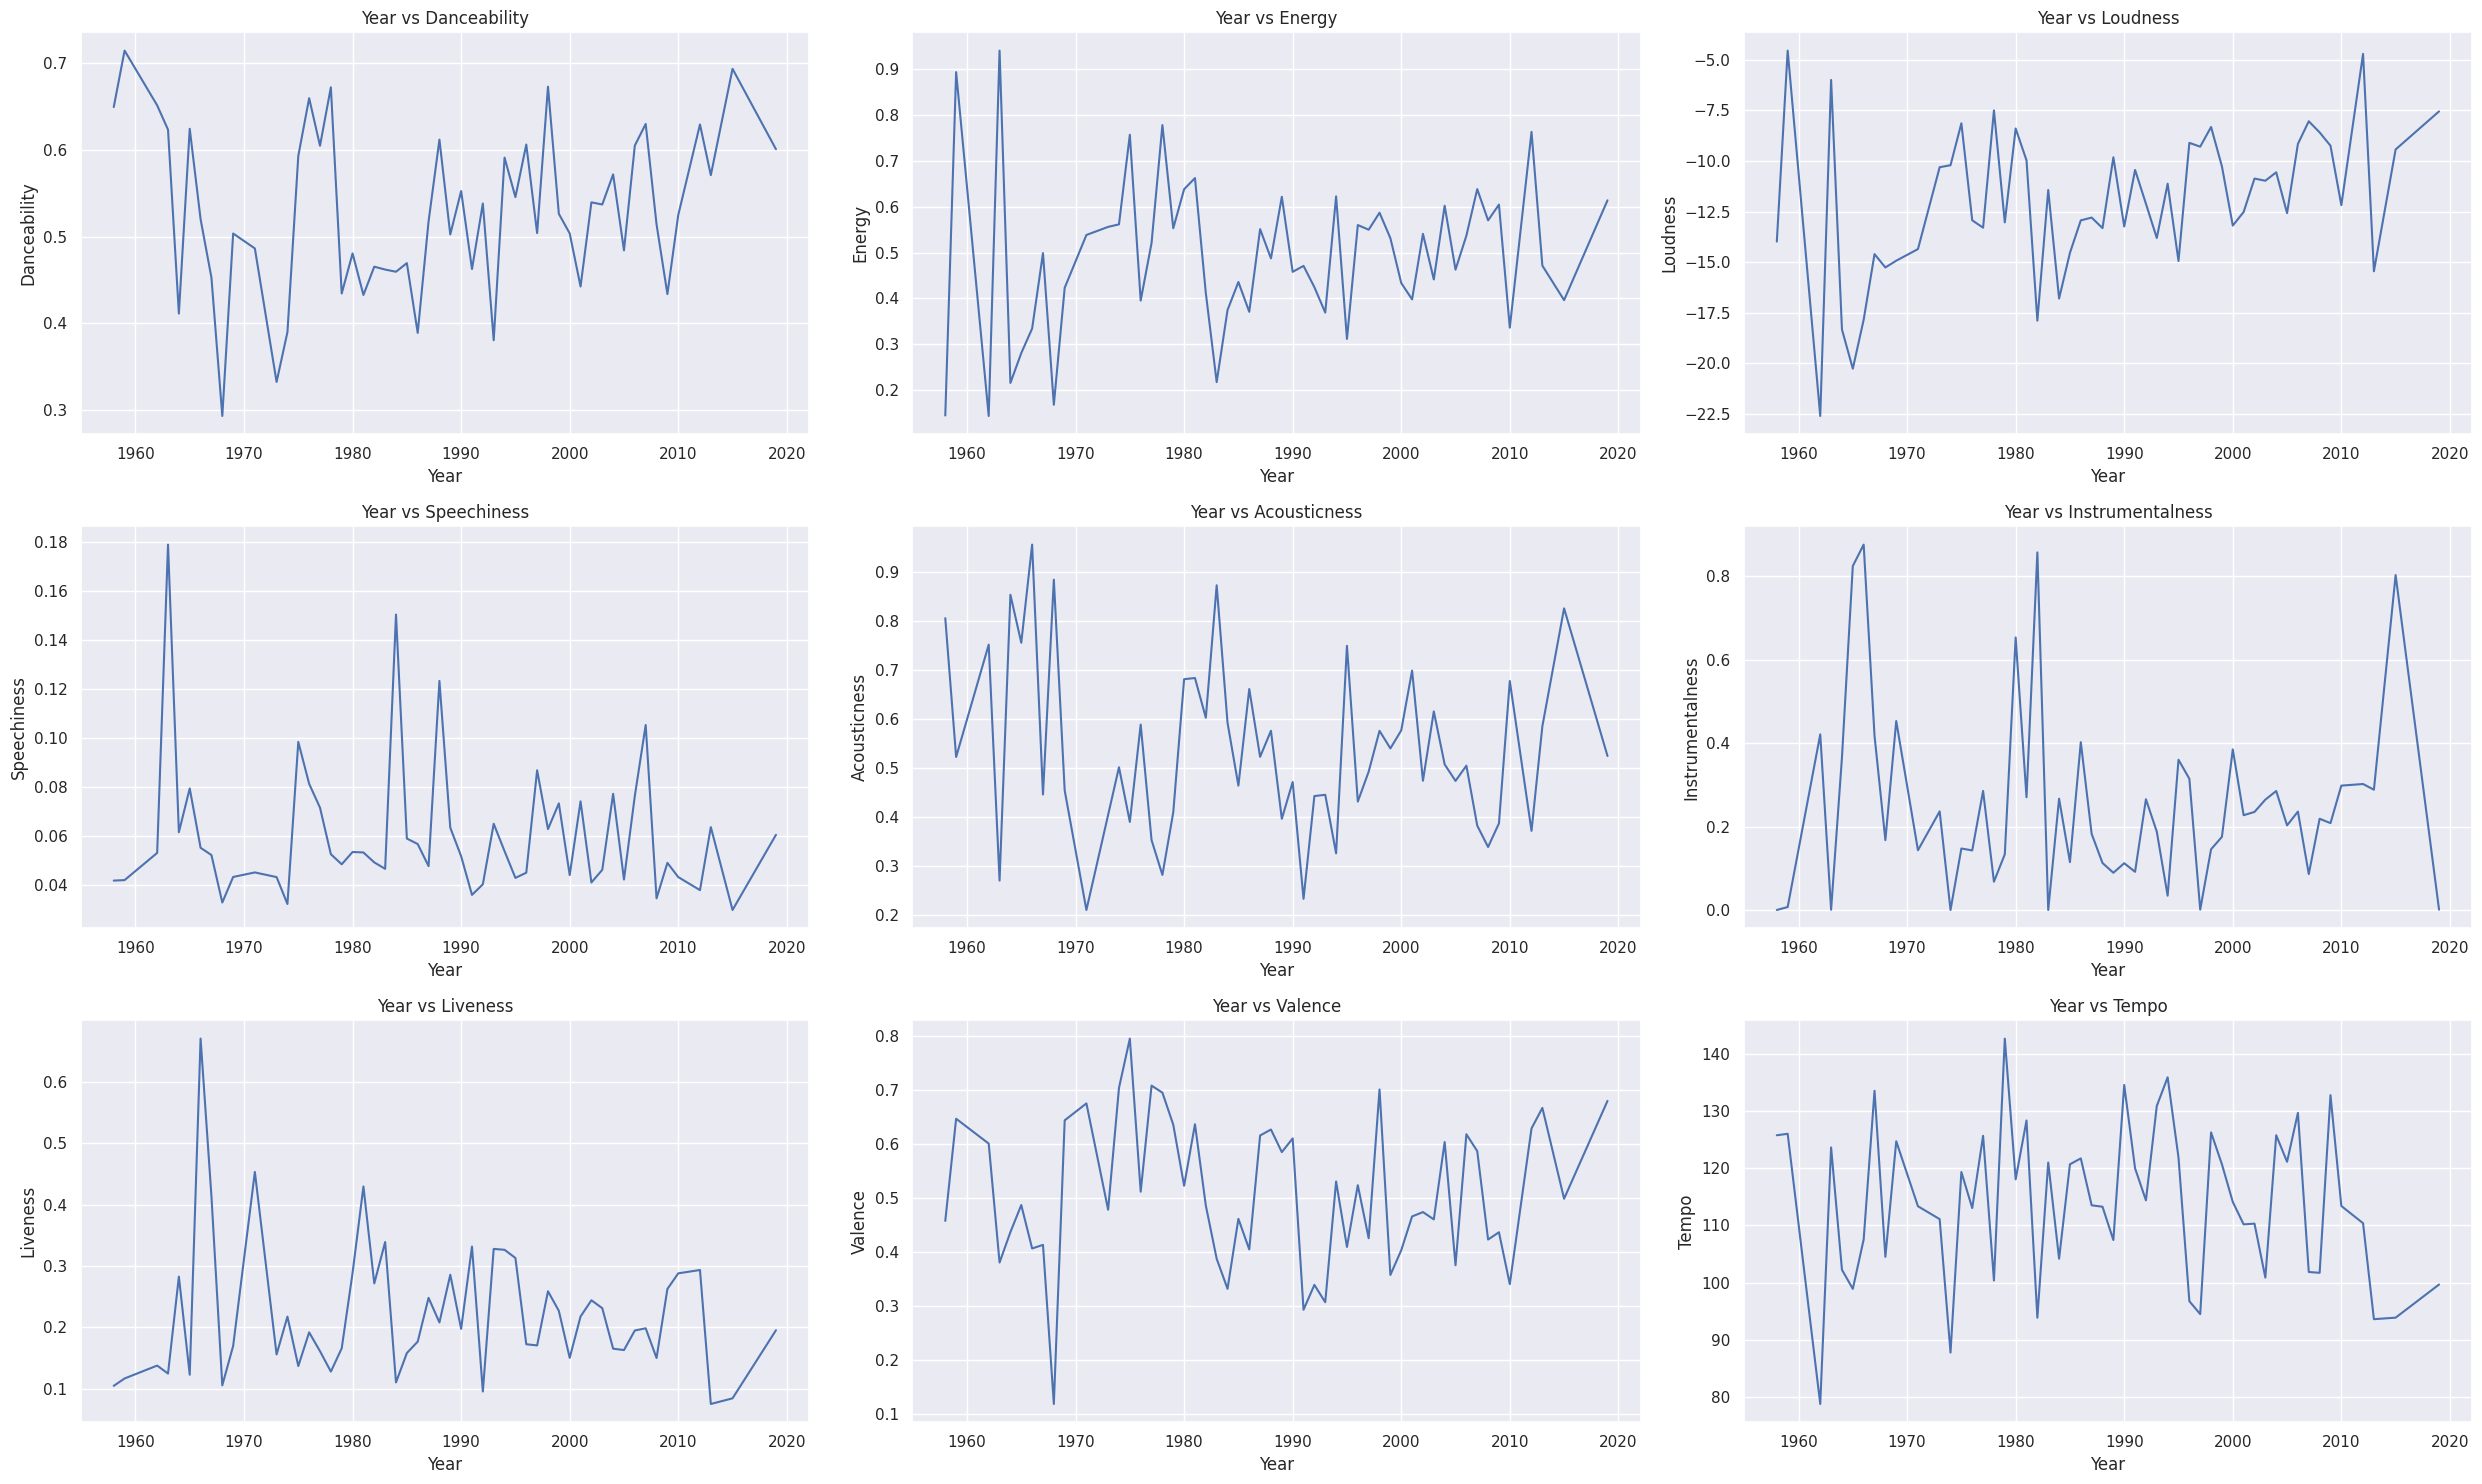

In [157]:
# create a scatter plot showing trends over the years with characteristics of the tracks
plt.figure(figsize=(25, 15))
for i, col in enumerate(columns_to_plot, start=1):
    plt.subplot(3, 3, i)  # Adjust the grid size based on the number of plots
    plt.plot(df2["Year"], df2[col])
    plt.title(f'Year vs {col}')
    plt.xlabel('Year')
    plt.ylabel(col)

plt.tight_layout()
plt.show()